In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Будет использован алгоритм XGBoost для прогнозирования студентов, которые прошли более 50% курса

In [2]:
#Импорт данных из csv файла

In [3]:
df_course= pd.read_csv('/Users/denis/Downloads/3.csv')
df_course.head()

,Launch Date,Course title,Teachers,Course Subject,Participants (Course Content Accessed),Audited (> 50% Course Content Accessed),Certified,% Audited,% Certified,% Certified of > 50% Course Content Accessed,% Grade Higher Than Zero,Total Course Hours (Thousands),Median Hours for Certification,Median Age,% Male,% Female,% Bachelor's Degree or Higher
0,09/05/2012,Java Developer. Professional,Чибриков Виталий,"OOP, Backend",36105.0,5431.0,3003.0,15.04,8.32,54.98,28.97,418.94,64.45,26.0,88.28,11.72,60.68
1,09/26/2012,Разработчик Android (deprecated),Ступников Станислав,Mobile,62709.0,8949.0,5783.0,14.27,9.22,64.05,39.50,884.04,78.53,28.0,83.50,16.50,63.04
2,10/09/2012,Python Developer. Professional,Титов Александр,"OOP, Backend",16663.0,2855.0,2082.0,17.13,12.49,72.85,34.89,227.55,61.28,27.0,70.32,29.68,58.76
3,10/15/2012,Разработчик Ruby,Лебедев Илья,"OOP, Backend",129400.0,12888.0,1439.0,9.96,1.11,11.11,1.11,220.90,0.00,28.0,80.02,19.98,58.78
4,10/15/2012,C++ Developer. Professional,Михальский Станислав,OOP,52521.0,10729.0,5058.0,20.44,9.64,47.12,32.52,804.41,76.10,32.0,56.78,43.22,88.33


In [4]:
#Просмотр типов данных. Это данные типа object, int, float

In [5]:
df_course.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 17 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Launch Date                                   220 non-null    object 
 1   Course title                                  220 non-null    object 
 2   Teachers                                      220 non-null    object 
 3   Course Subject                                220 non-null    object 
 4   Participants (Course Content Accessed)        220 non-null    float64
 5   Audited (> 50% Course Content Accessed)       220 non-null    float64
 6   Certified                                     220 non-null    float64
 7   % Audited                                     220 non-null    float64
 8   % Certified                                   220 non-null    float64
 9   % Certified of > 50% Course Content Accessed  220 non-null    flo

In [6]:
#Список категорий курсов

In [7]:
df_course['Course Subject'].value_counts()

OOP, Backend        61
Management          44
Devops              18
ML, BigData         18
Test                17
Administration      14
Security            12
Mobile              11
DB                   9
Frontend             5
Math                 4
ML                   3
Design               2
OOP                  1
OOP, Backend, DB     1
Name: Course Subject, dtype: int64

In [8]:
#Список преподавателей 

In [9]:
df_course['Teachers'].value_counts()

Павленко Андрей      2
Вьюнова Дарья        2
Ржевский Михаил      2
Михайлов Матвей      2
Васильев Егор        2
                    ..
Деваева Нина         1
Волосатов Евгений    1
Борзых Никита        1
Горшков Михаил       1
Слесарев Сергей      1
Name: Teachers, Length: 215, dtype: int64

### Просмотр значений NULL в данных, установленных с помощью тепловой карты:

<AxesSubplot:>

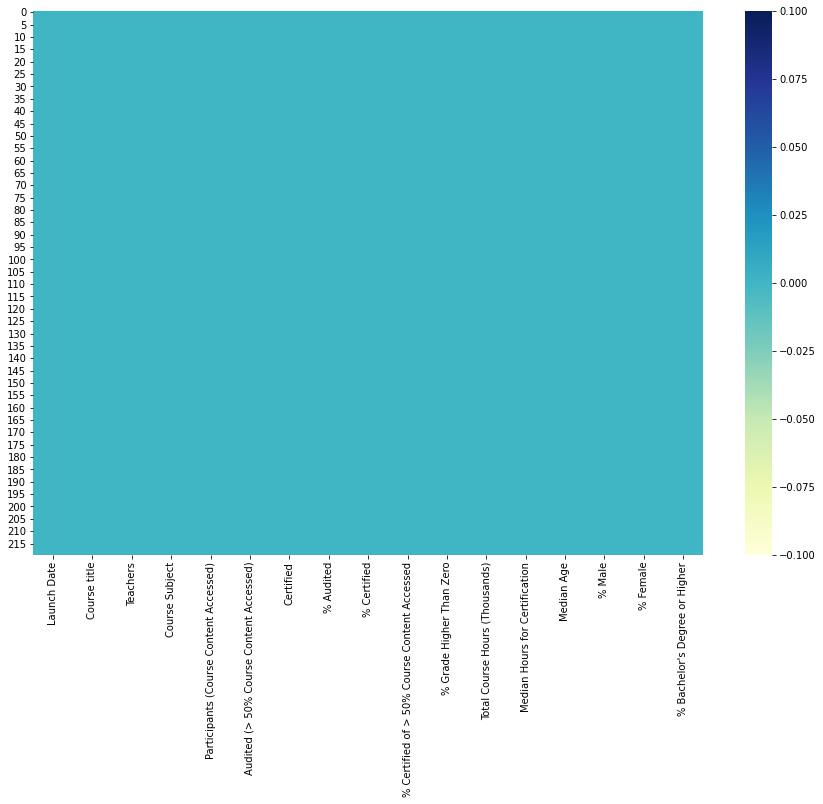

In [10]:
plt.figure(figsize=(15,10))
sns.heatmap(df_course.isnull(),cmap="YlGnBu")

## Визуализация данных

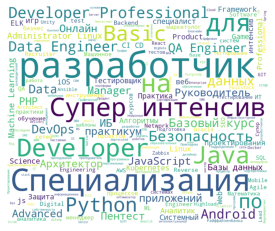

In [11]:
from wordcloud import WordCloud, STOPWORDS

wordcloud = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='white',
                          width=1200,
                          height=1000
                         ).generate(" ".join(df_course['Course title']))


plt.imshow(wordcloud)
plt.axis('off')
plt.show()

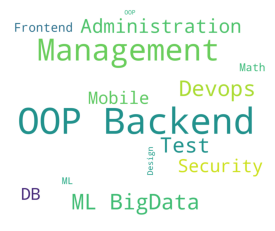

In [12]:
wordcloud = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='white',
                          width=1200,
                          height=1000
                         ).generate(" ".join(df_course['Course Subject']))


plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [13]:
df_course=df_course.drop(['% Certified','Course title','% Grade Higher Than Zero'],axis=1)
df_course

,Launch Date,Teachers,Course Subject,Participants (Course Content Accessed),Audited (> 50% Course Content Accessed),Certified,% Audited,% Certified of > 50% Course Content Accessed,Total Course Hours (Thousands),Median Hours for Certification,Median Age,% Male,% Female,% Bachelor's Degree or Higher
0,09/05/2012,Чибриков Виталий,"OOP, Backend",36105.0,5431.0,3003.0,15.04,54.98,418.94,64.45,26.0,88.28,11.72,60.68
1,09/26/2012,Ступников Станислав,Mobile,62709.0,8949.0,5783.0,14.27,64.05,884.04,78.53,28.0,83.50,16.50,63.04
2,10/09/2012,Титов Александр,"OOP, Backend",16663.0,2855.0,2082.0,17.13,72.85,227.55,61.28,27.0,70.32,29.68,58.76
3,10/15/2012,Лебедев Илья,"OOP, Backend",129400.0,12888.0,1439.0,9.96,11.11,220.90,0.00,28.0,80.02,19.98,58.78
4,10/15/2012,Михальский Станислав,OOP,52521.0,10729.0,5058.0,20.44,47.12,804.41,76.10,32.0,56.78,43.22,88.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,01/04/2016,Назаров Илья,Administration,8377.0,3783.0,127.0,45.16,3.36,21.30,42.73,25.0,92.54,7.46,64.22
216,01/07/2016,Казанцев Александр,Management,13798.0,3365.0,2231.0,24.39,66.30,97.71,28.01,29.0,60.16,39.84,75.91
217,01/07/2016,Гертовский Александр,"ML, BigData",5747.0,303.0,101.0,5.27,33.33,53.10,200.43,23.0,84.11,15.89,49.44
218,01/13/2016,Гуров Павел,Devops,63658.0,8805.0,3744.0,13.83,42.52,248.96,17.62,26.0,81.23,18.77,61.74


<AxesSubplot:>

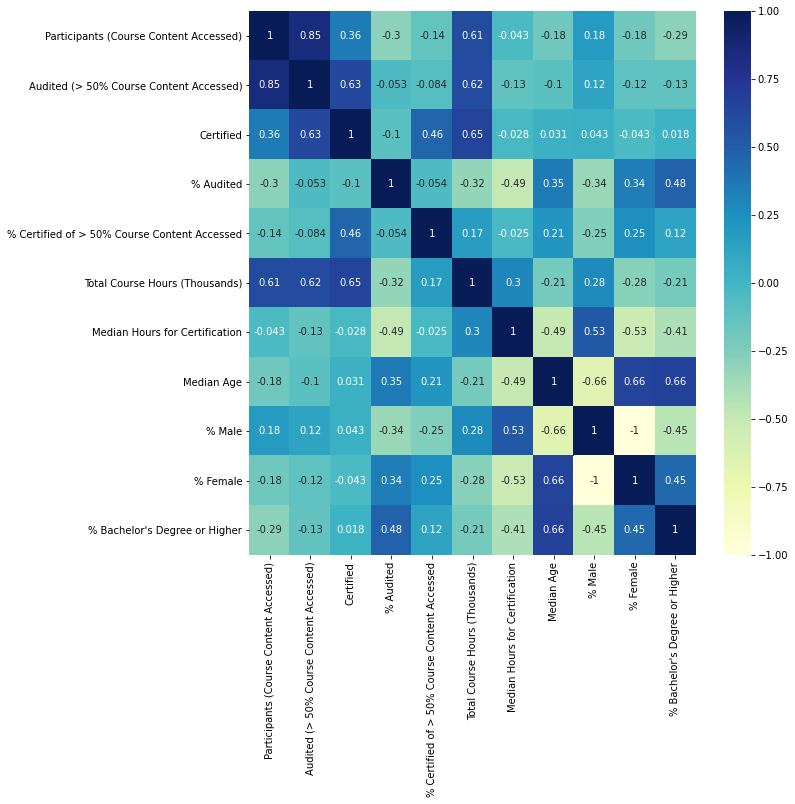

In [14]:
figure= plt.figure(figsize=(10,10))
sns.heatmap(df_course.corr(), annot=True,cmap="YlGnBu")

<AxesSubplot:xlabel='Course Subject', ylabel='% Certified of > 50% Course Content Accessed'>

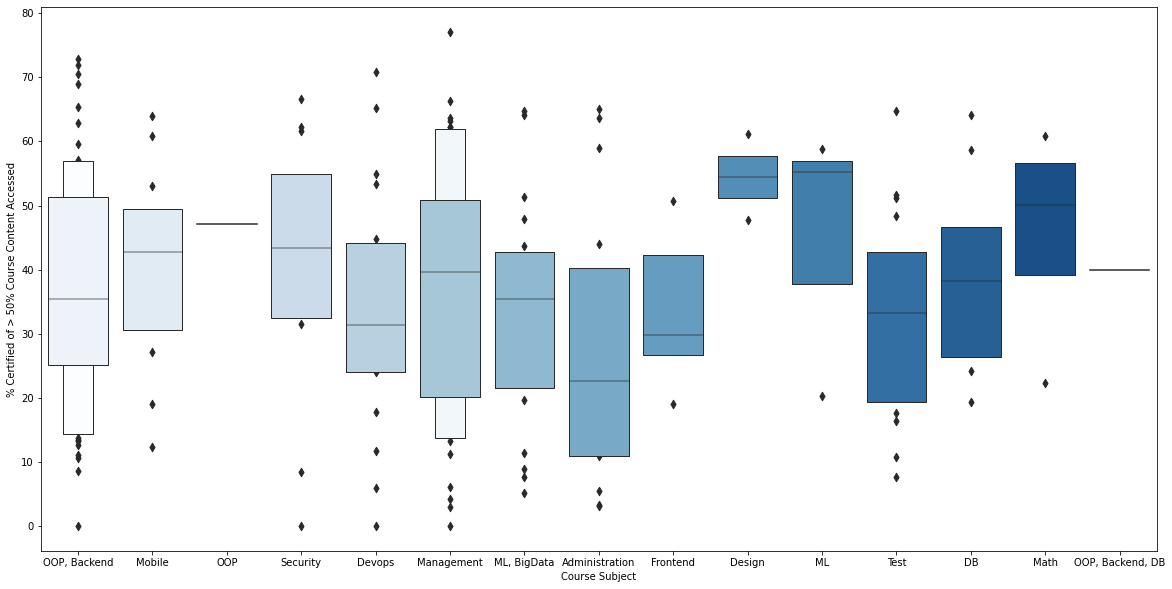

In [15]:
figure= plt.figure(figsize=(20,10))
sns.boxenplot(x='Course Subject',y='% Certified of > 50% Course Content Accessed',data=df_course,palette="Blues")

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Participants (Course Content Accessed)', ylabel='Course Subject'>

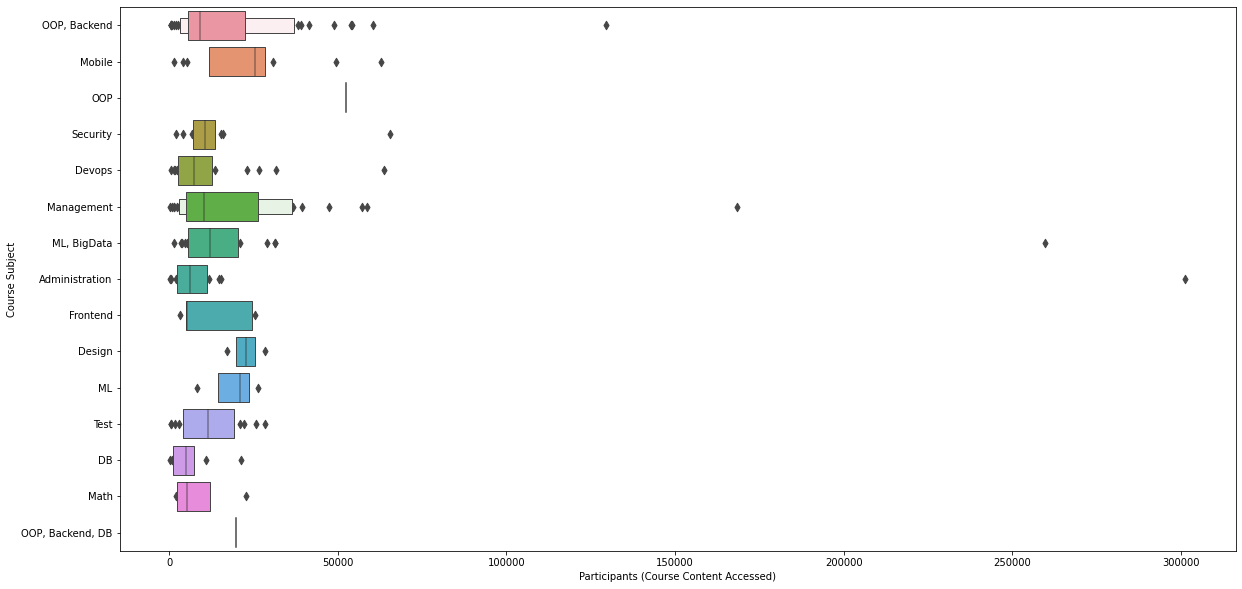

In [16]:
figure= plt.figure(figsize=(20,10))
sns.boxenplot('Participants (Course Content Accessed)','Course Subject',data=df_course)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  wa

<Figure size 1440x1440 with 0 Axes>

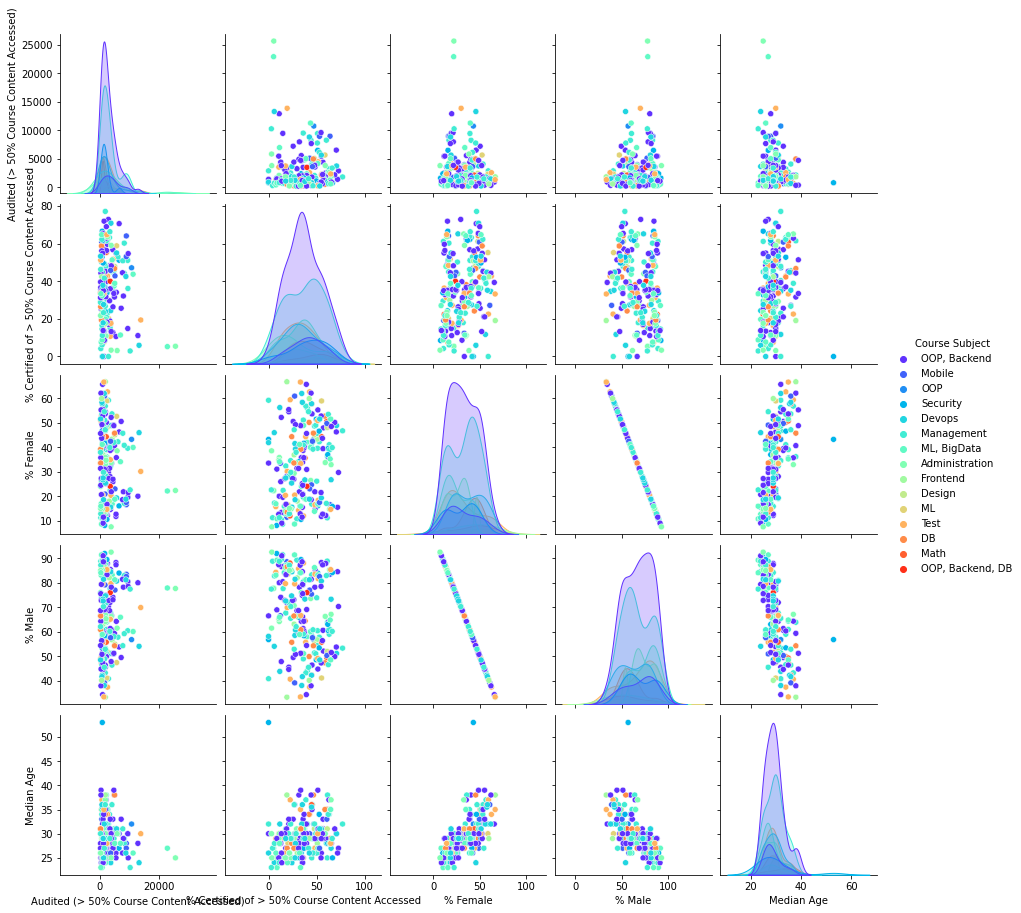

In [17]:
df_pairplot_cols=df_course[['Course Subject','Audited (> 50% Course Content Accessed)','% Certified of > 50% Course Content Accessed','% Female','% Male','Median Age']]
plt.figure(figsize=(20,20))
sns.pairplot(df_pairplot_cols,hue='Course Subject',palette='rainbow')

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


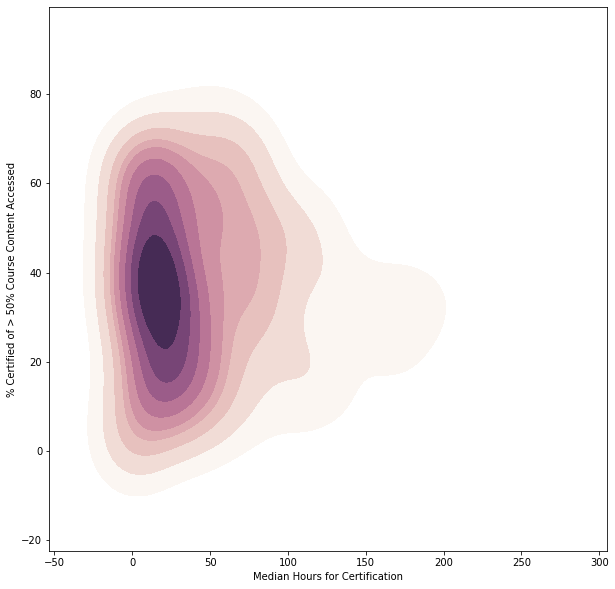

In [18]:
x= df_course['Median Hours for Certification']
y= df_course['% Certified of > 50% Course Content Accessed']
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
plt.figure(figsize=(10,10))
sns.kdeplot(x, y, cmap=cmap, shade=True);

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


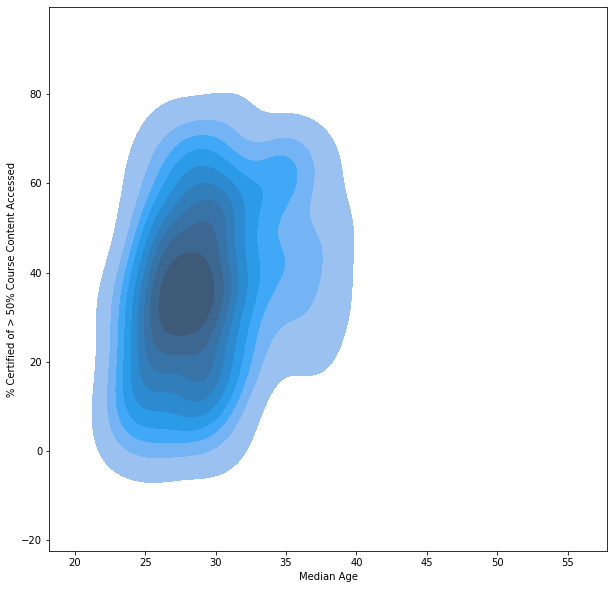

In [19]:
x= df_course['Median Age']
y= df_course['% Certified of > 50% Course Content Accessed']
plt.figure(figsize=(10,10))
sns.kdeplot(x, y, shade=True);

# Подготовка данных:
## удаление ненужных столбцов

In [20]:
df_course.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 14 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Launch Date                                   220 non-null    object 
 1   Teachers                                      220 non-null    object 
 2   Course Subject                                220 non-null    object 
 3   Participants (Course Content Accessed)        220 non-null    float64
 4   Audited (> 50% Course Content Accessed)       220 non-null    float64
 5   Certified                                     220 non-null    float64
 6   % Audited                                     220 non-null    float64
 7   % Certified of > 50% Course Content Accessed  220 non-null    float64
 8   Total Course Hours (Thousands)                220 non-null    float64
 9   Median Hours for Certification                220 non-null    flo

In [21]:
df_XGB = df_course.drop(['Certified','Audited (> 50% Course Content Accessed)','Teachers','Launch Date'],axis=1)

In [22]:
df_XGB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 10 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Course Subject                                220 non-null    object 
 1   Participants (Course Content Accessed)        220 non-null    float64
 2   % Audited                                     220 non-null    float64
 3   % Certified of > 50% Course Content Accessed  220 non-null    float64
 4   Total Course Hours (Thousands)                220 non-null    float64
 5   Median Hours for Certification                220 non-null    float64
 6   Median Age                                    220 non-null    float64
 7   % Male                                        220 non-null    float64
 8   % Female                                      220 non-null    float64
 9   % Bachelor's Degree or Higher                 220 non-null    flo

### Преобразование категориальных переменных в серии нулей и единиц, что значительно упрощает их количественное определение и сравнение.

In [23]:

CourseSubject = pd.get_dummies(df_XGB['Course Subject'],drop_first=True)
df_XGB.drop(['Course Subject'],axis=1,inplace=True)
df_XGB = pd.concat([df_XGB,CourseSubject],axis=1)


In [24]:
df_XGB

,Participants (Course Content Accessed),% Audited,% Certified of > 50% Course Content Accessed,Total Course Hours (Thousands),Median Hours for Certification,Median Age,% Male,% Female,% Bachelor's Degree or Higher,DB,...,ML,"ML, BigData",Management,Math,Mobile,OOP,"OOP, Backend","OOP, Backend, DB",Security,Test
0,36105.0,15.04,54.98,418.94,64.45,26.0,88.28,11.72,60.68,0,...,0,0,0,0,0,0,1,0,0,0
1,62709.0,14.27,64.05,884.04,78.53,28.0,83.50,16.50,63.04,0,...,0,0,0,0,1,0,0,0,0,0
2,16663.0,17.13,72.85,227.55,61.28,27.0,70.32,29.68,58.76,0,...,0,0,0,0,0,0,1,0,0,0
3,129400.0,9.96,11.11,220.90,0.00,28.0,80.02,19.98,58.78,0,...,0,0,0,0,0,0,1,0,0,0
4,52521.0,20.44,47.12,804.41,76.10,32.0,56.78,43.22,88.33,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,8377.0,45.16,3.36,21.30,42.73,25.0,92.54,7.46,64.22,0,...,0,0,0,0,0,0,0,0,0,0
216,13798.0,24.39,66.30,97.71,28.01,29.0,60.16,39.84,75.91,0,...,0,0,1,0,0,0,0,0,0,0
217,5747.0,5.27,33.33,53.10,200.43,23.0,84.11,15.89,49.44,0,...,0,1,0,0,0,0,0,0,0,0
218,63658.0,13.83,42.52,248.96,17.62,26.0,81.23,18.77,61.74,0,...,0,0,0,0,0,0,0,0,0,0


## Проверка на нулевые значения:

<AxesSubplot:>

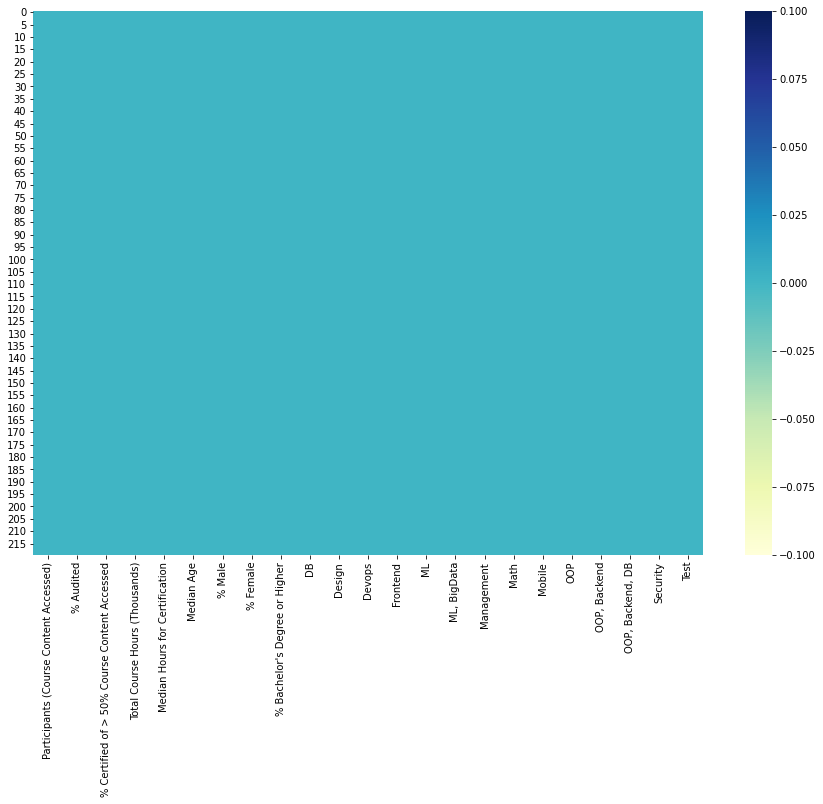

In [25]:
plt.figure(figsize=(15,10))
sns.heatmap(df_XGB.isnull(),cmap="YlGnBu")

# XGBOOST


## Разделение на обучающую и тестовую выборки

In [37]:
from sklearn.model_selection import train_test_split

x= df_XGB
y=df_XGB['% Certified of > 50% Course Content Accessed']
import re
# x = x.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
# y = y.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.4, random_state=109)

In [27]:
import xgboost as xgb
train= xgb.DMatrix(x_train,label=y_train)
test = xgb.DMatrix(x_test, label= y_test)

### XGBoost гиперпараметры
#### learning_rate: уменьшение размера шага, используемое для предотвращения переобучения. Диапазон [0,1]
#### max_depth: определяет, насколько глубоко каждое дерево может расти во время любого раунда повышения.
#### subsample: процент использованных образцов на дерево. Низкое значение может привести к неполному оснащению.
#### colsample_bytree: процент функций, используемых в дереве. Высокое значение может привести к переобучению.
#### n_estimators: количество деревьев, которые вы хотите построить.
#### objective: определяет функцию потерь, которая будет использоваться, например, reg: линейная для задач регрессии, reg: логистика для задач классификации с единственным решением, двоичная: логистика для задач классификации с вероятностью.
XGBoost также поддерживает параметры регуляризации, чтобы наказывать модели по мере их усложнения и сводить их к простым (экономным) моделям.
#### gamma: контролирует, будет ли данный узел разделен на основе ожидаемого сокращения потерь после разделения. Чем выше значение, тем меньше расщеплений. 
#### alpha: L1 регуляризация весов листьев. Большое значение ведет к большей регуляризации.
#### lambda: L2 регуляризация весов листьев и более плавная, чем регуляризация L1.


In [45]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.5, learning_rate = 0.2,
                max_depth = 7, alpha = 10, n_estimators = 75)

In [46]:
xg_reg.fit(x_train,y_train)
preds = xg_reg.predict(x_test)


[15:56:22] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[15:56:23] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.


## Ошибка

In [47]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 4.731237


## ______________________________________________________________________________________

## Визуализация деревьев

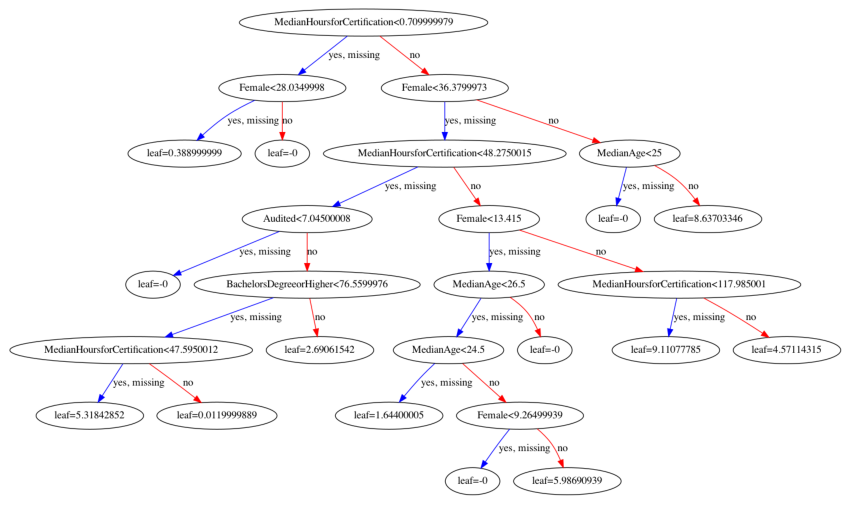

In [48]:
import matplotlib.pyplot as plt

xgb.plot_tree(xg_reg,num_trees=0)
plt.rcParams['figure.figsize'] = [80, 60]
plt.show()

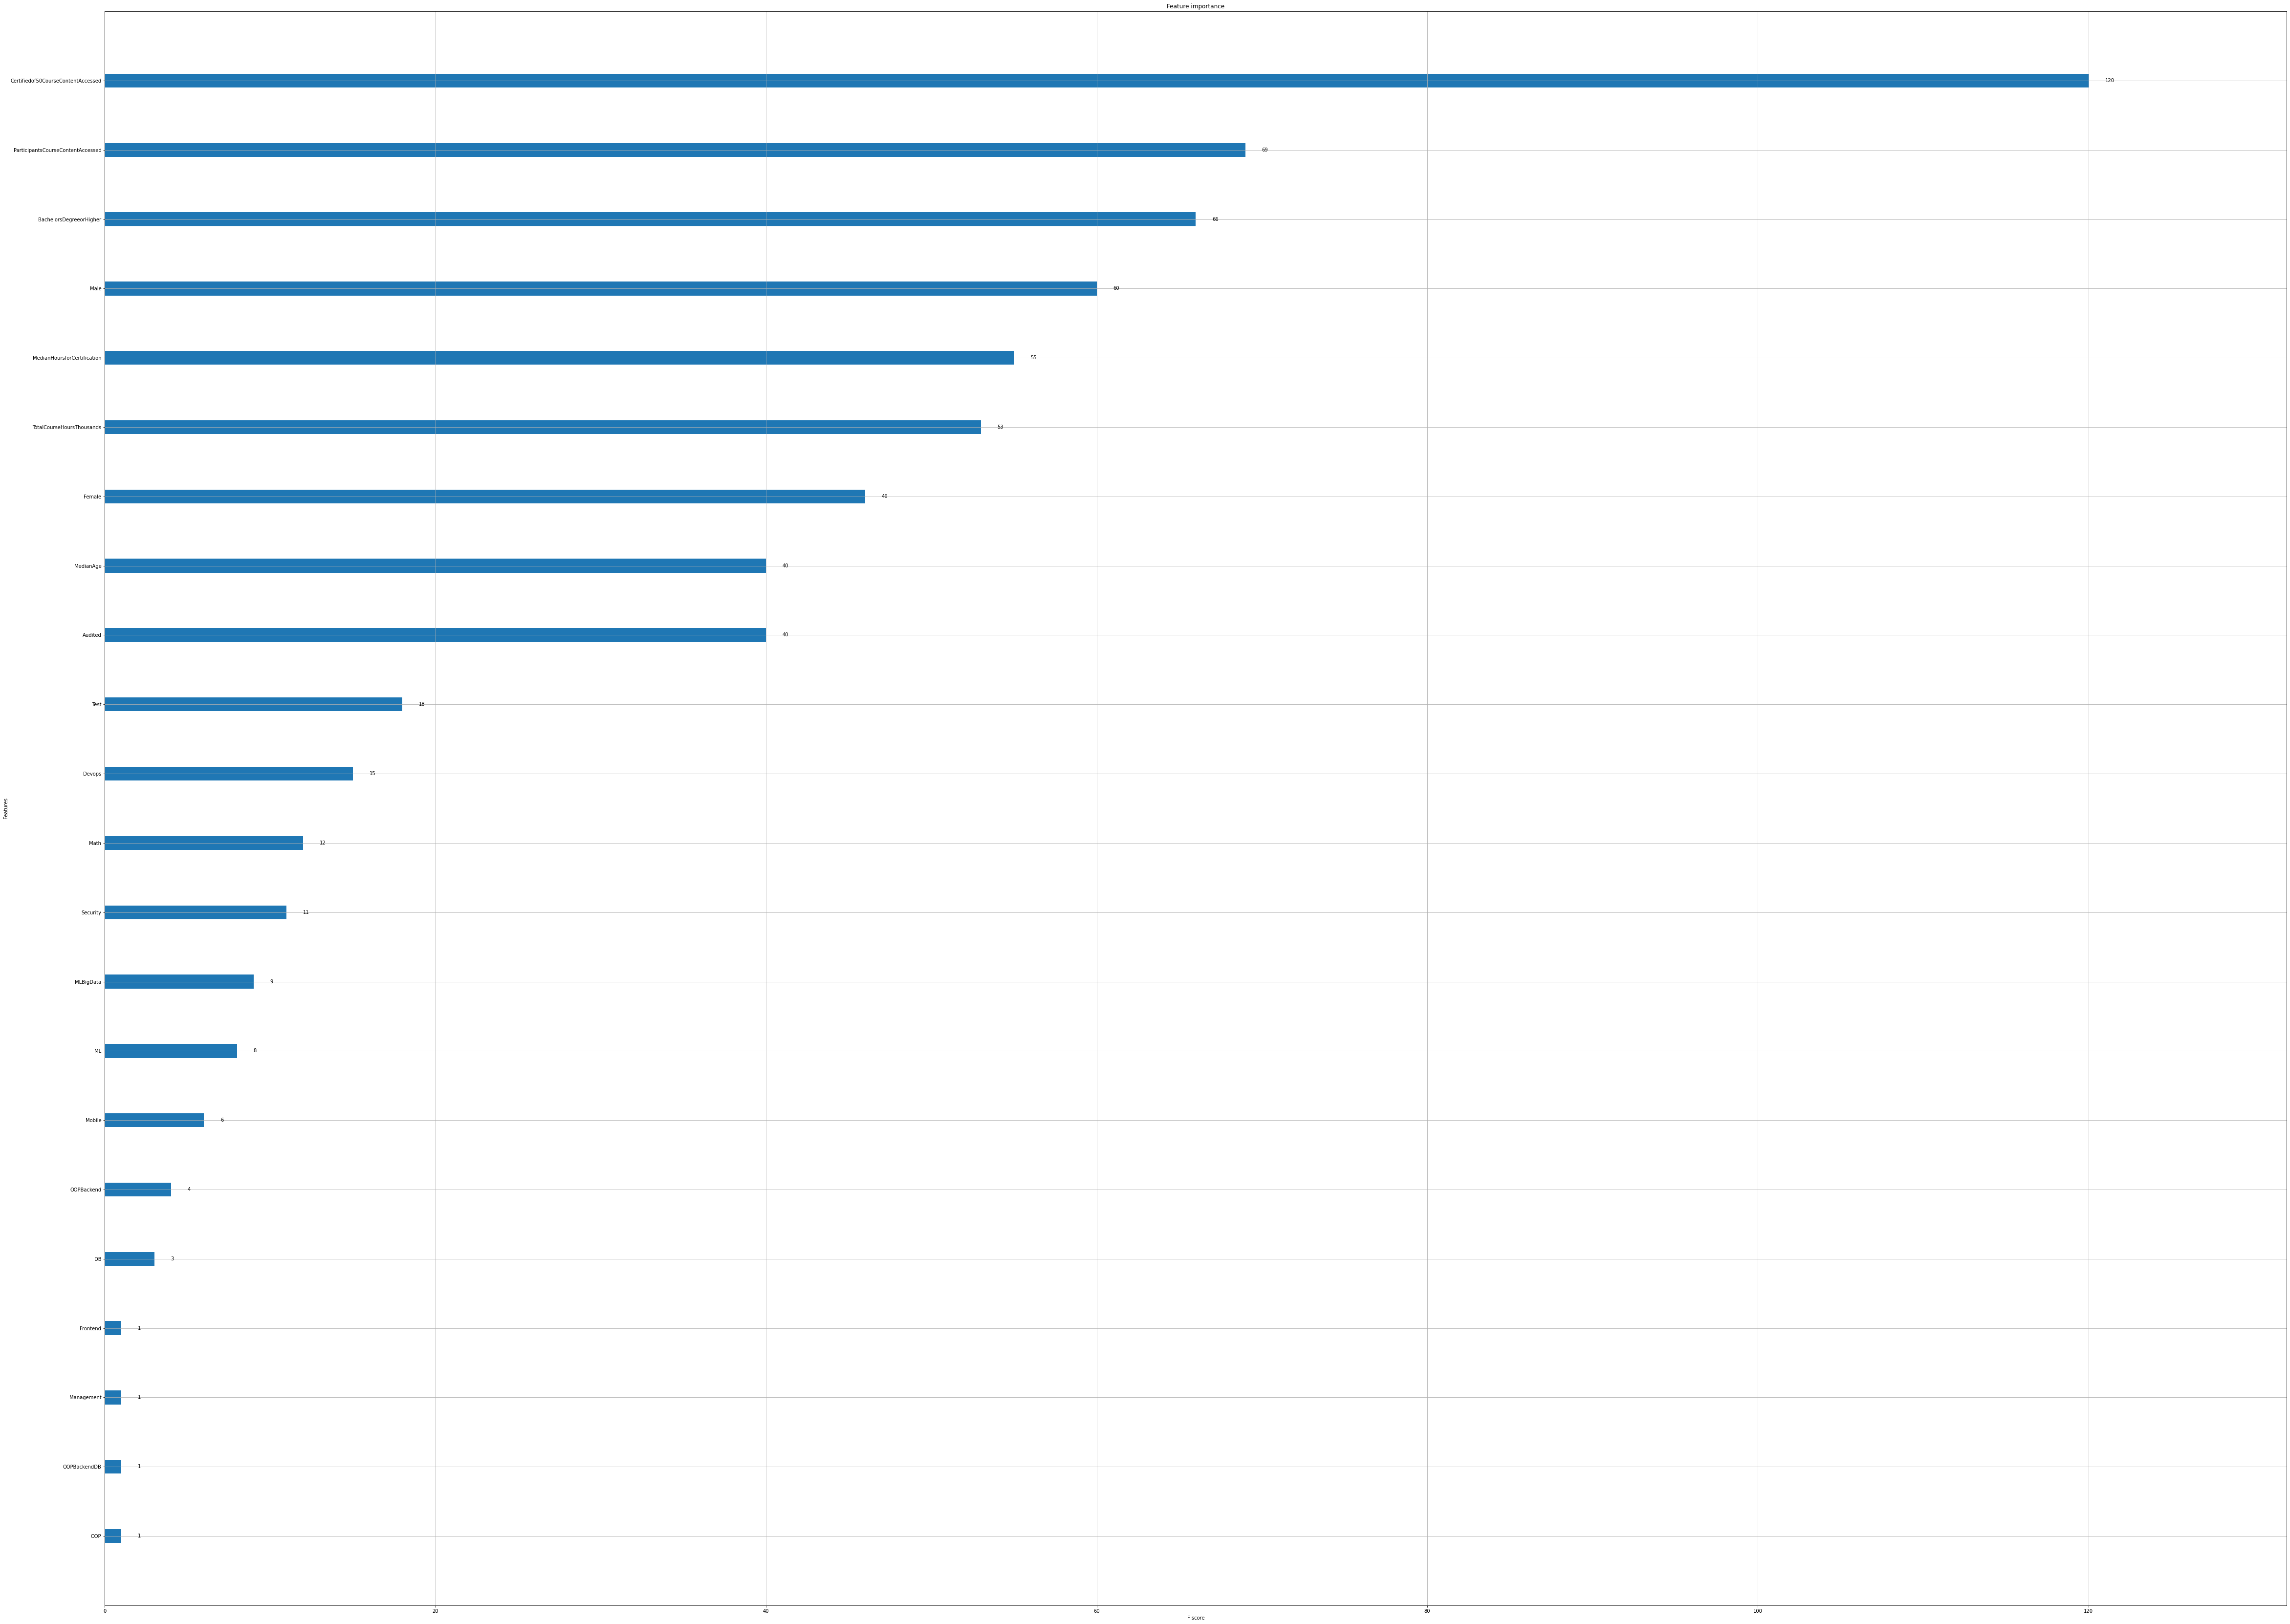

In [49]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [15,15]
plt.show()

In [50]:
from catboost import CatBoostRegressor

model = CatBoostRegressor(iterations=2,
                          learning_rate=0.2,
                          depth=7)

model.fit(x_train,y_train)
# Get predictions
preds = model.predict(x_test)

0:	learn: 16.1271426	total: 1.94ms	remaining: 1.94ms
1:	learn: 14.2029819	total: 4.9ms	remaining: 0us


In [51]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 15.053815


In [58]:

from lightgbm import LGBMRegressor

# define dataset

model = LGBMRegressor()
model.fit(x_train,y_train)
# make a single prediction
yhat = model.predict(x_test)
print('Prediction: %d' % yhat[0])
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

Prediction: 63
RMSE: 15.053815


In [59]:
Выбор метрик для последующей оценки качества моделей. Необходимо выбрать не менее двух метрик и обосновать выбор.
Возьмем метрики MAE, Median Absolute Error и R².

MAE (Mean Absolute Error) — это среднее модуля ошибки. Данная метрика удобна, она не чувствительна к выбросам, как MSE, показывает среднюю ошибку
Медиана абсолютного отклонения(Median Absolute Error) - это альтернатива стандартного отклонения, менее чувствительна к воздействию промахов
Коэффициент детерминации показывает, насколько модель соответствует или не соответствует данным.

SyntaxError: invalid syntax (<ipython-input-59-63d9c08d7338>, line 1)

In [60]:
class MetricLogger:
    
    def __init__(self):
        self.df = pd.DataFrame(
            {'metric': pd.Series([], dtype='str'),
            'alg': pd.Series([], dtype='str'),
            'value': pd.Series([], dtype='float')})

    def add(self, metric, alg, value):
        """
        Добавление значения
        """
        # Удаление значения если оно уже было ранее добавлено
        self.df.drop(self.df[(self.df['metric']==metric)&(self.df['alg']==alg)].index, inplace = True)
        # Добавление нового значения
        temp = [{'metric':metric, 'alg':alg, 'value':value}]
        self.df = self.df.append(temp, ignore_index=True)

    def get_data_for_metric(self, metric, ascending=True):
        """
        Формирование данных с фильтром по метрике
        """
        temp_data = self.df[self.df['metric']==metric]
        temp_data_2 = temp_data.sort_values(by='value', ascending=ascending)
        return temp_data_2['alg'].values, temp_data_2['value'].values
    
    def plot(self, str_header, metric, ascending=True, figsize=(5, 5)):
        """
        Вывод графика
        """
        array_labels, array_metric = self.get_data_for_metric(metric, ascending)
        fig, ax1 = plt.subplots(figsize=figsize)
        pos = np.arange(len(array_metric))
        rects = ax1.barh(pos, array_metric,
                         align='center',
                         height=0.5, 
                         tick_label=array_labels)
        ax1.set_title(str_header)
        for a,b in zip(pos, array_metric):
            plt.text(0.5, a-0.05, str(round(b,3)), color='white')
        plt.show()

In [62]:
Выбор наиболее подходящих моделей для решения задачи регрессии.
Возьмем модели случайный лес и дерево решений, поскольку они показали оптимальные результаты.
В качестве ансамблевой модели возьмем 'TREE+RF=>LR' модель


SyntaxError: invalid syntax (<ipython-input-62-e51c04bf4a53>, line 1)

In [64]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score 
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.svm import SVC, NuSVC, LinearSVC, OneClassSVM, SVR, NuSVR, LinearSVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import ExtraTreesClassifier, ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.utils import shuffle

In [65]:
# Модели
regr_models = {'Tree':DecisionTreeRegressor(max_depth=8),
               'RF':RandomForestRegressor(max_depth=10, n_estimators=30),
              }

In [66]:
# Сохранение метрик
regrMetricLogger = MetricLogger()

In [71]:
def regr_train_model(model_name, model, regrMetricLogger):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    from sklearn.metrics import mean_squared_error
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print("RMSE: %f" % (rmse))
    
#     mae = mean_absolute_error(y_test, y_pred)
#     medae = median_absolute_error(y_test, y_pred)
#     r2 = r2_score(y_test, y_pred)

#     regrMetricLogger.add('MAE', model_name, mae)
#     regrMetricLogger.add('MedAE', model_name, medae)
#     regrMetricLogger.add('R2', model_name, r2)    
    
#     print('*****************************************************')
#     print(model)
#     print()
#     print('MAE={}, MedAE={}, R2={}'.format(
#         round(mae, 3), round(medae, 3), round(r2, 3)))
#     print('*****************************************************')

In [72]:
for model_name, model in regr_models.items():
    regr_train_model(model_name, model, regrMetricLogger)

RMSE: 0.794440
RMSE: 0.524198


In [75]:
from heamy.estimator import Regressor
from heamy.pipeline import ModelsPipeline
from heamy.dataset import Dataset
# набор данных
dataset = Dataset(x_train, y_train, x_test)
# Возьмем лучшую модель: 'TREE+RF=>LR'
# модели первого уровня
model_tree = Regressor(dataset=dataset, estimator=DecisionTreeRegressor, parameters={'max_depth':5},name='tree')
model_lr = Regressor(dataset=dataset, estimator=LinearRegression, name='lr')
model_rf = Regressor(dataset=dataset, estimator=RandomForestRegressor, parameters={'max_depth':5},name='rf')

# Первый уровень - две модели: дерево и случайный лес
# Второй уровень: линейная регрессия 
pipeline = ModelsPipeline(model_tree, model_rf)
stack_ds = pipeline.stack(k=10, seed=1)
# модель второго уровня
stacker = Regressor(dataset=stack_ds, estimator=LinearRegression)
results = stacker.validate(k=10,scorer=mean_squared_error)


Metric: mean_squared_error
Folds accuracy: [0.25312465695696973, 0.5047404381032766, 0.8875531947860823, 0.3231000847757143, 7.838849161820208, 0.3329332991562002, 0.24625818948219136, 0.9759512613607104, 0.17973686302048716, 1.748579682683661]
Mean accuracy: 1.3290826832145501
Standard Deviation: 2.2182815989518327
Variance: 4.920773252248299
